(392, 580)
196.0
290.0


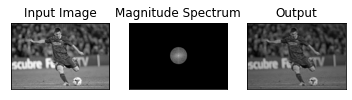

In [2]:
# %load p4.py
# Baseado no codigo de:
# Daniel Osternack Barros Neves
# Filtro passa baixa

#!/usr/bin/python
import math
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('../images/messi5.jpg',0)

print (img.shape)
f = np.fft.fft2(img)    #dothefouriertransform
fshift1 = np.fft.fftshift(f)    #shiftthezerotothecenter

tamY = fshift1.shape[0]/2
tamX = fshift1.shape[1]/2
print (tamY)
print (tamX)

for y in range(0, fshift1.shape[0]):
 for x in range(0, fshift1.shape[1]):
   if math.sqrt((tamY-y) * (tamY-y) + (tamX-x) * (tamX-x)) > 50:
      fshift1[y,x] = 255;

#spectrumimage
magnitude_spectrum = 20 * np.log(np.abs(fshift1))

f_ishift = np.fft.ifftshift(fshift1)  #inverseshift
img_back = np.fft.ifft2(f_ishift) #inversefouriertransform
img_back = np.abs(img_back)

plt.subplot(131),plt.imshow(img,cmap='gray')
plt.title('Input Image'),plt.xticks([]),plt.yticks([])
plt.subplot(132),plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back, cmap='gray')
plt.title('Output'), plt.xticks([]), plt.yticks([])
plt.show()
